## Deliverable #3 

### Data source location:-

The Dataset is available for free download using the below link.
https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv

For overview and more info:
https://data.london.gov.uk/dataset/number-international-visitors-london


### Data source Discovery:-
I found this Dataset in one of the links provided in the Data sources in Blackboard. I went through a lot of other Datasets but I felt that this Dataset has interesting hypotheses around it and a lot of analysis can be done on it.

### Legality and Cost:-
This Dataset is absolutely free to download and legal to access as well.

### Documented EDA:-
There's no such EDA or Visualization available on the web for this Dataset.

### Possible Hypothesis from Deliverables #1:-

* The size of this Dataset is 4.99 MB with 11 columns and 58977 rows and this file with these many records fits perfectly into the Data 601 Objectives of Project-2. A lot of good questions can be asked about this data

For Example some Hypothesis about which we are going to Analyse are:-

1: Did fewer tourists traveled to London during the recession period?

2: Does London see more visitors in Quarter 4?(Oct-Dec)

3: Do business travelers spend less nights in London when compared to others?

4: During which quarters of an year is London likely to see more visitors?

5: London sees more visitors from european countries?

## Performing Exploratory Data Analysis on the Dataset

* Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning.

### 1. Importing the necessary Libraries

In [1]:
# including the required libraries

import pandas as pd
import numpy as np
import seaborn as sns # for visualisation
import matplotlib.pyplot as plt # for visualisation
%matplotlib inline 
sns.set(color_codes=True)

### 2. Reading the Data from CSV to Dataframe

In [2]:
#Read the data from the csv using the download link into a Dataframe directly

data = pd.read_csv("https://data.london.gov.uk/download/number-international-visitors-london/b1e0f953-4c8a-4b45-95f5-e0d143d5641e/international-visitors-london-raw.csv",engine='python',encoding= 'unicode_escape')


### 3. Structure of the Dataframe

In [3]:
# printing the size of the data frame which gives in the format of (rows,columns)

print('(Number of rows, Number of Columns)')
data.shape

(Number of rows, Number of Columns)


(61462, 11)

In [4]:
# data types of all the columns in the dataframe

data.dtypes

year              object
quarter           object
market            object
dur_stay          object
mode              object
purpose           object
area              object
Visits (000s)    float64
Spend (£m)       float64
Nights (000s)    float64
sample             int64
dtype: object

In [5]:
# gives the first five rows from the data frame

data.head(5)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,January-March,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1


In [6]:
# gives the last five rows from the data frame

data.tail(5)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
61457,2020P,January-March,Other Africa,4-7 nights,Air,Miscellaneous,LONDON,1.695331,1.103167,8.831038,2
61458,2020P,January-March,Other Africa,8-14 nights,Air,Holiday,LONDON,1.486972,2.022254,7.836555,1
61459,2020P,January-March,Other Africa,8-14 nights,Air,VFR,LONDON,2.416554,1.847152,63.894432,2
61460,2020P,January-March,Other Africa,15+ nights,Air,Holiday,LONDON,2.472653,1.006109,35.080377,2
61461,2020P,January-March,Other Africa,15+ nights,Air,VFR,LONDON,4.124325,3.960705,134.909755,4


### 4. Dropping irrelevant columns

* This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution which enables to focus on the relevant columns.
* Here the 'sample', 'mode' columns as no significance with my hypothesis i am dropping the columns.

In [7]:
visitors_data = data.drop(['sample', 'mode'], axis=1)
visitors_data.head(5)

,year,quarter,market,dur_stay,purpose,area,Visits (000s),Spend (£m),Nights (000s)
0,2002,January-March,Belgium,1-3 nights,Holiday,LONDON,3.572186,0.969138,6.954456
1,2002,January-March,Belgium,1-3 nights,Business,LONDON,9.284226,2.399577,12.604959
2,2002,January-March,Belgium,1-3 nights,VFR,LONDON,0.877182,0.089833,2.153128
3,2002,January-March,Belgium,1-3 nights,Miscellaneous,LONDON,0.163874,0.010160,0.163874
4,2002,January-March,Belgium,1-3 nights,Business,LONDON,1.648670,0.016789,1.650300


### 5. Renaming the columns

* In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach which improves the readability of the data set.

In [8]:
visitors_data = visitors_data.rename(columns={'year': 'YEAR', 'quarter': 'QUARTER', 'market': 'MARKET_PLACE','dur_stay': 'STAY_DURATION', 'purpose': 'PURPOSE_OF_VISIT','area': 'PLACE_OF_VISIT', 'Visits (000s)': 'VISITS', 'Spend (£m)': 'AMOUNT_SPENT', 'Nights (000s)': 'NIGHTS_STAYED'})

visitors_data.head(5)


,YEAR,QUARTER,MARKET_PLACE,STAY_DURATION,PURPOSE_OF_VISIT,PLACE_OF_VISIT,VISITS,AMOUNT_SPENT,NIGHTS_STAYED
0,2002,January-March,Belgium,1-3 nights,Holiday,LONDON,3.572186,0.969138,6.954456
1,2002,January-March,Belgium,1-3 nights,Business,LONDON,9.284226,2.399577,12.604959
2,2002,January-March,Belgium,1-3 nights,VFR,LONDON,0.877182,0.089833,2.153128
3,2002,January-March,Belgium,1-3 nights,Miscellaneous,LONDON,0.163874,0.010160,0.163874
4,2002,January-March,Belgium,1-3 nights,Business,LONDON,1.648670,0.016789,1.650300


In [9]:
# The shape of the data after dropping and renaming the columns

visitors_data.shape

(61462, 9)

In [10]:
# counting the data before dropping the duplicate rows
visitors_data.count()

YEAR                61462
QUARTER             61462
MARKET_PLACE        61462
STAY_DURATION       61462
PURPOSE_OF_VISIT    61462
PLACE_OF_VISIT      61462
VISITS              61462
AMOUNT_SPENT        61462
NIGHTS_STAYED       61462
dtype: int64

### 6. Dropping the duplicate rows

* This is often a handy thing to do because a huge data set as in this case contains 61462 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. 

In [11]:
# Rows containing duplicate data
duplicate_rows = visitors_data[visitors_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows.shape)

number of duplicate rows:  (0, 9)


* From the above result we can see that there are no duplicate rows present in the dataset.

### 7. Dropping the missing or null values

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, I just dropped that missing values. 

In [12]:
# Finding the null values.
print(visitors_data.isnull().sum())

YEAR                0
QUARTER             0
MARKET_PLACE        0
STAY_DURATION       0
PURPOSE_OF_VISIT    0
PLACE_OF_VISIT      0
VISITS              0
AMOUNT_SPENT        0
NIGHTS_STAYED       0
dtype: int64


* From the above result we can see that there are no missing values in the dataset

In [15]:
#Check for unique values per column present in the Data
visitors_data.nunique()

YEAR                   19
QUARTER                 4
MARKET_PLACE           62
STAY_DURATION           4
PURPOSE_OF_VISIT        5
PLACE_OF_VISIT          1
VISITS              55965
AMOUNT_SPENT        60614
NIGHTS_STAYED       60368
dtype: int64

* From the above result we can see the unique values per column

### 8. Just go through the DataFrame visitors_data for summary statistics

#### Using describe function

* The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data

In [16]:
#Just for an overview look at all the columns

visitors_data.describe(include='all')

,YEAR,QUARTER,MARKET_PLACE,STAY_DURATION,PURPOSE_OF_VISIT,PLACE_OF_VISIT,VISITS,AMOUNT_SPENT,NIGHTS_STAYED
count,61462,61462,61462,61462,61462,61462,61462.000000,61462.000000,61462.000000
unique,19,4,62,4,5,1,NaN,NaN,NaN
top,2010,July-September,France,1-3 nights,Holiday,LONDON,NaN,NaN,NaN
freq,3601,16827,2611,19710,19695,61462,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.927651,3.086634,30.300852
std,NaN,NaN,NaN,NaN,NaN,NaN,10.061362,7.243874,61.898302
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000103,0.000000,0.000309
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.822888,0.321693,3.901581
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.797305,1.047351,10.676935
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.416618,3.007542,29.483044


### 9. Sample Plots

#### i. Plotting histograms to understand the columnar data and their significance to draw the hypothesis in future

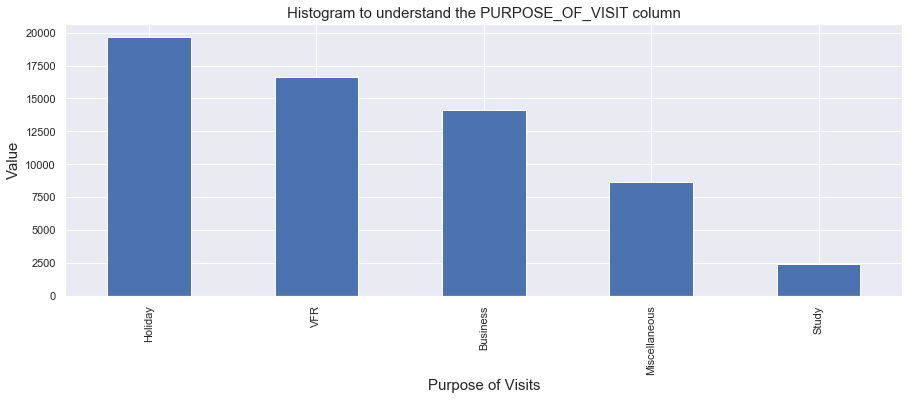

In [36]:
# Plotting a Histogram
visitors_data.PURPOSE_OF_VISIT.value_counts().nlargest(100).plot(kind= "bar", figsize=(15,5))
plt.title("Histogram to understand the PURPOSE_OF_VISIT column",fontsize=15)
plt.xlabel("Purpose of Visits",fontsize=15);
plt.ylabel("Value",fontsize=15);

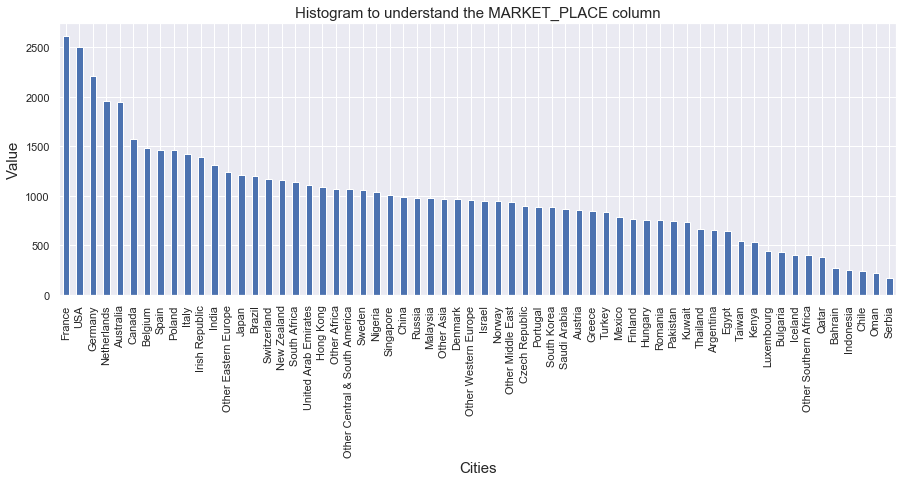

In [35]:
# Plotting a Histogram
visitors_data.MARKET_PLACE.value_counts().nlargest(100).plot(kind= "bar", figsize=(15,5))
plt.title("Histogram to understand the MARKET_PLACE column",fontsize=15)
plt.xlabel("Cities",fontsize=15);
plt.ylabel("Value",fontsize=15);

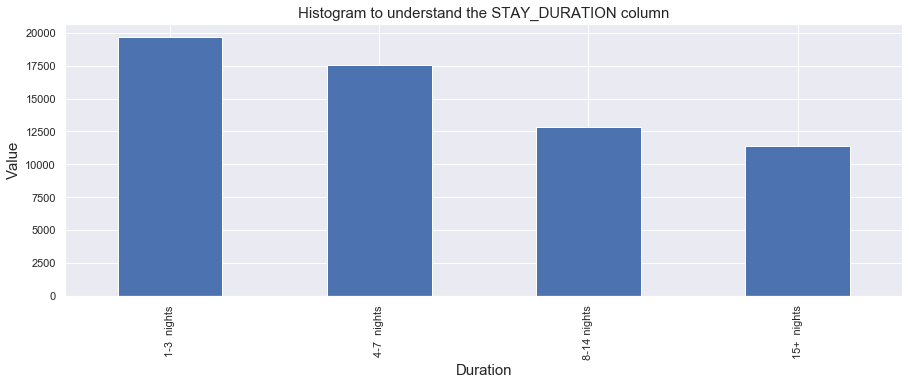

In [34]:
# Plotting a Histogram
visitors_data.STAY_DURATION.value_counts().nlargest(100).plot(kind= "bar", figsize=(15,5))
plt.title("Histogram to understand the STAY_DURATION column",fontsize=15)
plt.xlabel("Duration",fontsize=15);
plt.ylabel("Value",fontsize=15);

#### ii. Drawing a pairplot to understand the relationship between the columns

* To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. 

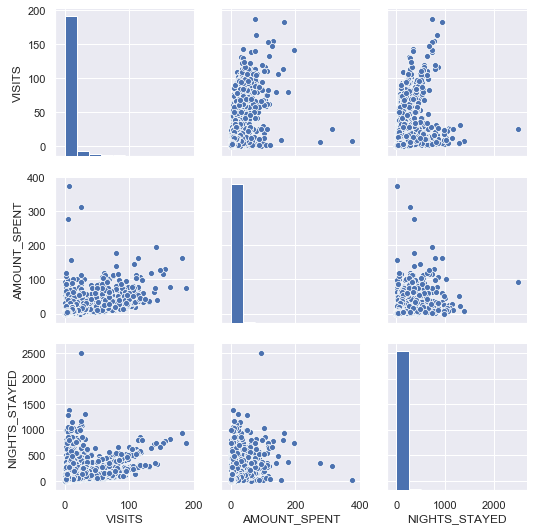

In [21]:
sns.pairplot(visitors_data)

### 10. Let us look at the first Hypothesis  



### 1: Did fewer tourists traveled to London during the recession period? (2008 and 2009)

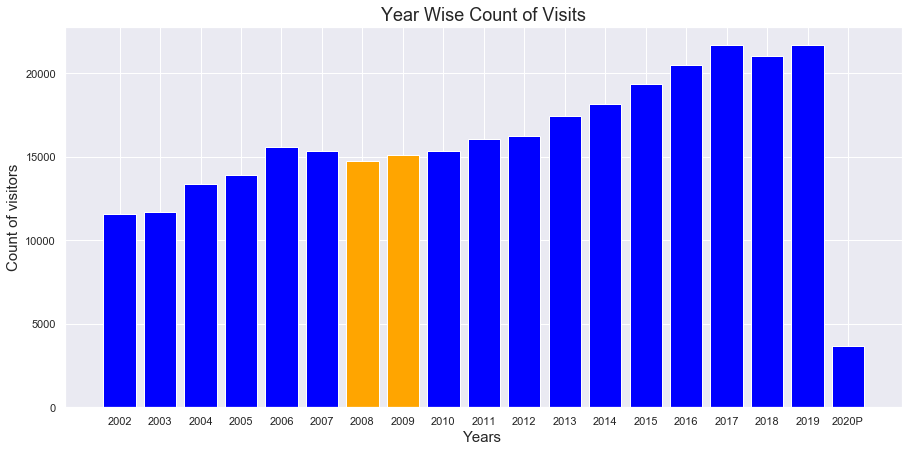

In [23]:
#Group by year and count the number of visits
Year_wise_count=visitors_data.groupby(['YEAR']).sum()['VISITS']
plt.figure(figsize=(15,7))

recession_years=['2008','2009']
#To plot different color for recession years
for i,v in Year_wise_count.iteritems():
    #print(type(i),v)
    if i in recession_years:
        _=plt.bar(i,v,color='orange')
    else:
        _=plt.bar(i,v,color='blue')

#Setting the titles, x and y labels        
_=plt.xlabel('Years ',fontsize=15)
_=plt.ylabel('Count of visitors',fontsize=15)
_=plt.title('Year Wise Count of Visits',fontsize=18)
plt.show()


* We can see that there was a slight drop in 2008 but the count of visitors increased in 2009, so we can conclude that the hypothesis is true for one year but false for another.
* Also clearly we can see the performance of 2020 and the huge drop is due to COVID-19 pandemic.

## Let us look at the second Hypothesis  

### 2: Does London see more visitors in Quarter 4?(Oct-Dec)

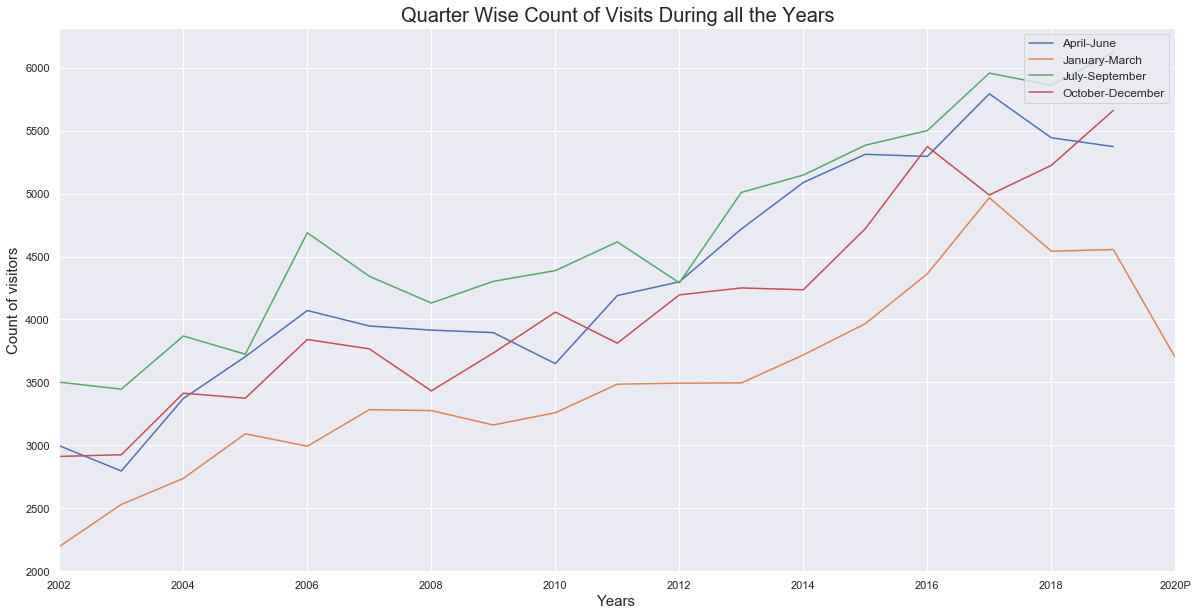

In [24]:
#Grouping by year and quarter and counting the number of visits and plotting a line graph
_=visitors_data.groupby(['YEAR','QUARTER']).sum()['VISITS'].unstack().plot(kind='line',figsize=(20,10))

#Setting the titles, x and y labels and legends       
_=plt.xlabel('Years ',fontsize=15)
_=plt.ylabel('Count of visitors',fontsize=15)
_=plt.title('Quarter Wise Count of Visits During all the Years',fontsize=20)
_=plt.legend(loc=1,fontsize=12)
plt.show()


* From the above graph it is clear that the hypothesis is wrong as London saw more visitors during Quarter-3(Jul-Sep) but not Quarter-4 and this was true for all the years
* Also clearly we can see the performance of 2020 and the huge drop in the visits due to COVID-19 pandemic.

## Let us look at the third Hypothesis  

### 3: Do business travelers spend less nights in London when compared to others?

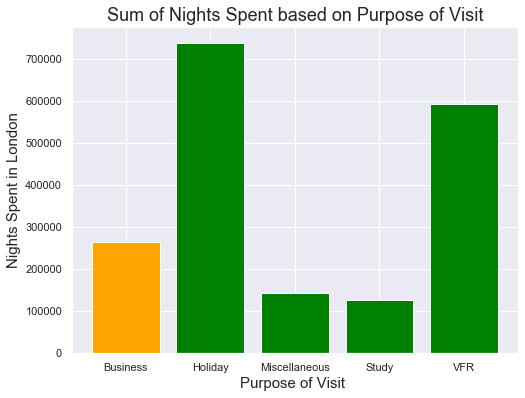

In [25]:
#Group by purpose of visit and sum the nights spent based on it
Night_purpose=visitors_data.groupby(['PURPOSE_OF_VISIT']).sum()['NIGHTS_STAYED']

#Plot the figure and assign a different color for the Business type of visitors
plt.figure(figsize=(8,6))
for i,v in Night_purpose.iteritems():
    #print(type(i),v)
    if i=='Business':
        _=plt.bar(i,v,color='orange')
    else:
        _=plt.bar(i,v,color='green')

#Setting the titles, x and y labels and legends             
_=plt.xlabel('Purpose of Visit ',fontsize=15)
_=plt.ylabel('Nights Spent in London',fontsize=15)
_=plt.title('Sum of Nights Spent based on Purpose of Visit',fontsize=18)


plt.show()

* From the above it is clear that Business Travelers did spend less nights compared to Holiday and VFR type of visitors but they spend more nights than the people visiting London for Study and Miscellaneous purpose.

### 4: Do people who visit london for Holidays spend more than Business?

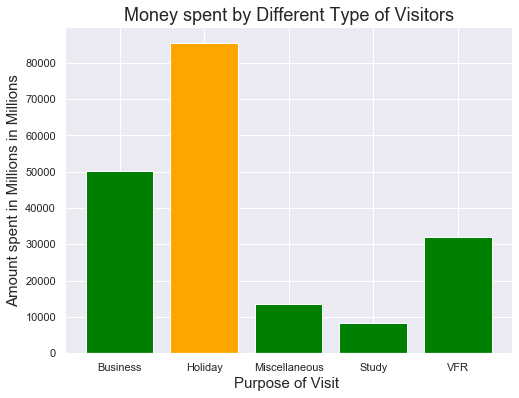

In [26]:
#Group by purpose and sum the amount spent
type_spend=visitors_data.groupby(['PURPOSE_OF_VISIT']).sum()['AMOUNT_SPENT']

#plot the bar graph with different color to identify the money spent by people visiting for holiday purpose 
plt.figure(figsize=(8,6))
for i,v in type_spend.iteritems():
    #print(type(i),v)
    if i=='Holiday':
        _=plt.bar(i,v,color='orange')
    else:
        _=plt.bar(i,v,color='green')

#Setting the titles, x and y labels        
_=plt.xlabel('Purpose of Visit ',fontsize=15)
_=plt.ylabel('Amount spent in Millions in Millions',fontsize=15)
_=plt.title('Money spent by Different Type of Visitors',fontsize=18)
plt.show()

* Yes, this hypothesis is true people who visit london for Holidays spend more than the people who visit for Business purpose

### 5: London sees more visitors from european countries?

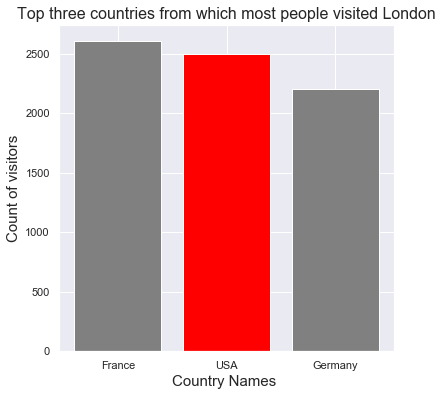

In [28]:
#Group by market(Countries) and count the number of visits 
n1=visitors_data.groupby(['MARKET_PLACE']).count()['VISITS'].nlargest(3)

eur_countries=['France','Germany','Spain','Italy','Portugal']

#Check for european countries and if any other country comes in top 3 plot the bar with a different color
plt.figure(figsize=(6,6))
for i,v in n1.iteritems():
    #print(type(i),v)
    if i in eur_countries:
        _=plt.bar(i,v,color='grey')
    else:
        _=plt.bar(i,v,color='red')


#Setting the titles, x and y labels   
_=plt.xlabel('Country Names ',fontsize=15)
_=plt.ylabel('Count of visitors',fontsize=15)
_=plt.title('Top three countries from which most people visited London',fontsize=16)
plt.show()

* This Hypothesis is true as the count of people from France and Germany are more but united states visiting London takes the second place.